In [1]:
import PIL, os
from PIL.ImageFilter import EDGE_ENHANCE_MORE, FIND_EDGES
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getImageComponents(image_path):
    im = PIL.Image.open(image_path).convert('L')
    im = im.transpose(PIL.Image.FLIP_TOP_BOTTOM)
    im = im.resize((200,200))
    
    points = []
    cs = plt.contour(im, levels = [245,255])
    paths = cs.collections[0].get_paths()
    for p in paths:
        pathsegs = p.iter_segments()
        for (x_pt, y_pt), _ in pathsegs:
            points.append(x_pt + 1j * y_pt)

    points = np.array(points)
    moy = np.mean(points)
    max = np.amax(np.abs(points))
    
    components = []
    comp = [points[0]]
    for idx in range(len(points) - 1):
        pt0 = points[idx]
        pt1 = points[idx+1]
        d = np.linalg.norm(pt0 - pt1)
        if d < 5: # distance max entre deux points voisins.
            comp.append(pt1)
        else:
            components.append((np.array(comp) - moy)/1) # pour l'affichage met 1, sinon fait max
            comp = [pt1]

    return components

/tmp/ipykernel_25385/986678817.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  comp = np.array(comp)


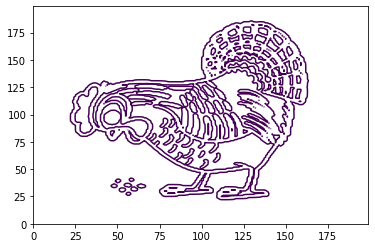

In [3]:
im_path = os.path.join('.', 'chicken.jpg')
comp = getImageComponents(im_path)

comp = np.array(comp)
lengths = [len(c) for c in comp]
indices = np.flip(np.argsort(lengths))
comp = comp[indices]

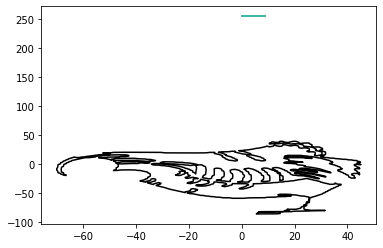

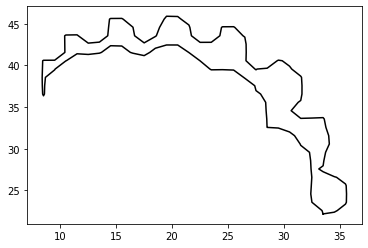

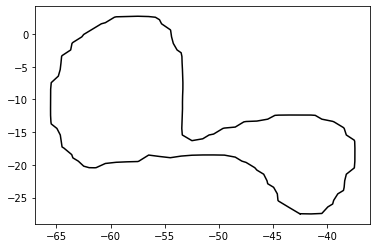

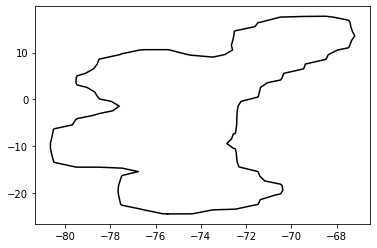

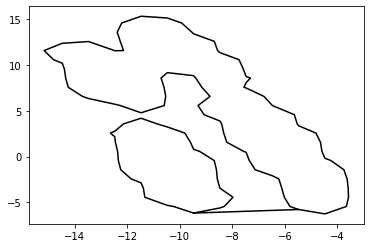

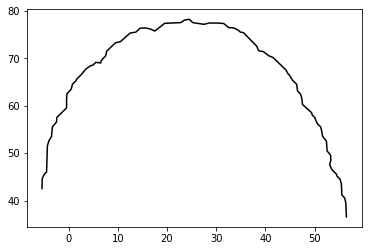

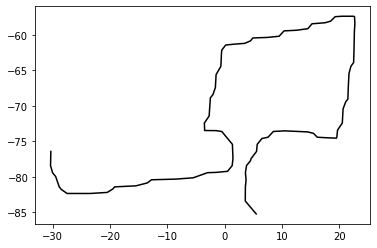

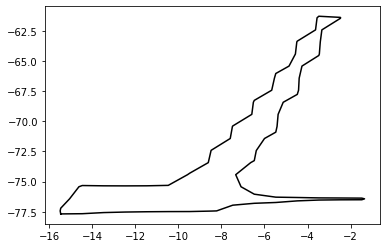

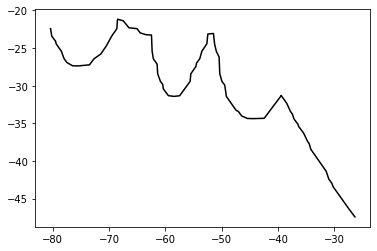

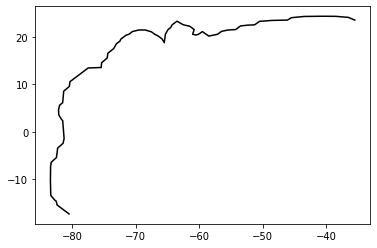

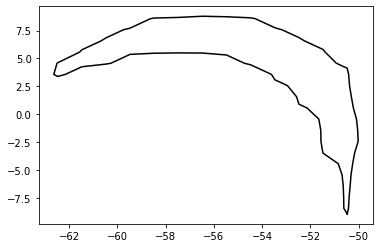

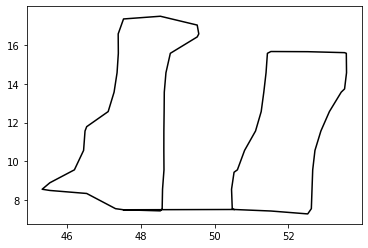

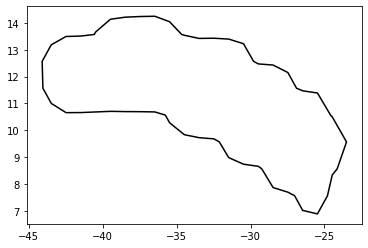

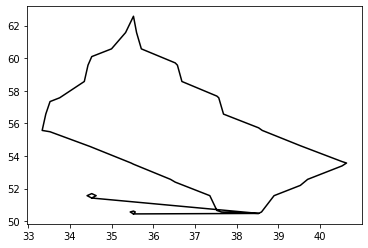

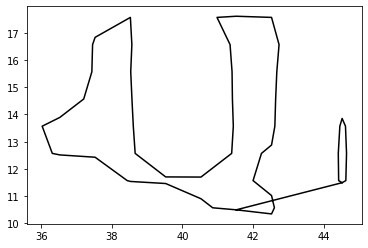

In [4]:
background = 255 * np.ones((10,10))
plt.plot(background)
for c in comp:
    if len(c) > 50:
        plt.plot(c.real, c.imag, color = (0,0,0))
        plt.show()

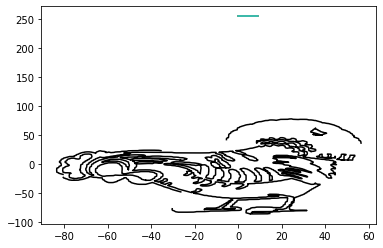

In [5]:
background = 255 * np.ones((10,10))
plt.plot(background)
for c in comp:
    if len(c) > 50:
        plt.plot(c.real, c.imag, color = (0,0,0))
plt.show()

Qt: Session management error: Could not open network socket


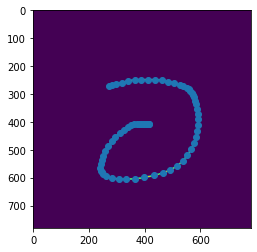

In [7]:
from drawingInterface import DrawingInterface

def decompose_points(points):
    x_values, y_values = [], []
    for pt in points:
        x, y = pt
        x_values.append(x)
        y_values.append(y)
    return np.array(x_values), np.array(y_values)

    
def getDrawingComponents(size = 780):
    drawingInterface = DrawingInterface((size, size))
    shapes = drawingInterface.get_shapes()

    components = []
    for shape in shapes:
        points = shape
        x_values, y_values = decompose_points(points)
        points = (x_values + 1j * (780-y_values))#/float(size)
        components.append(points)

    return components

comp = getDrawingComponents()

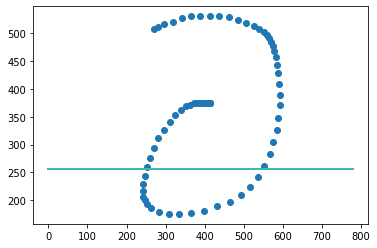

In [8]:
background = 255 * np.ones((780,780))
plt.plot(background)
for c in comp:
    plt.scatter(c.real, c.imag)
plt.show()